In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sympy.physics.units as u
import sympy as sp
import numpy as np
import logging as log
import functools
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
%matplotlib inline
from IPython.display import display, HTML

import importlib.util
#spec = importlib.util.spec_from_file_location("miptlabs", "/full/path/to/miptlabs.py")
#miptlabs = importlib.util.module_from_spec(spec)
#spec.loader.exec_module(miptlabs)
#ml = miptlabs

import miptlabs as ml
importlib.reload(ml)

import sys, importlib
importlib.reload(log)
log.basicConfig(level=log.INFO, format='LOG %(message)s', stream=sys.stdout)
sp.__version__

'1.1.2.dev'

In [3]:
rho_steel = ml.PQ(7800*u.kg/u.m**3, is_const=True)
rho_glass = ml.PQ(2500*u.kg/u.m**3, is_const=True)
g = ml.PQ(9.816*u.m/u.s**2, is_const=True)
S = ml.PQ(10*u.cm, sigma=0.1*u.cm)

In [4]:
data = pd.read_csv('lab2.2.6.csv')
data['d'] = data.apply(lambda row: ml.PQ(row['d']*u.mm, sigma=0.1*u.mm), axis=1)
data['t_fall'] = data.apply(lambda row: ml.PQ(row['t_fall']*u.s, sigma=0.1*u.s), axis=1)
data['T'] = data.apply(lambda row: ml.PQ(ml.celsium_to_kelvins(row['T']), sigma=0.1*u.kelvins), axis=1)
data['rho_fluid'] = data.apply(lambda row: ml.PQ(row['rho_fluid']*u.kg/u.m**3, sigma=1*u.kg/u.m**3), axis=1)

data['r'] = data['d']/2
data['rho_ball'] = data.apply(lambda row: rho_steel if row['material'] == 'сталь' else rho_glass, axis=1)
data['v_уст'] = data.apply(lambda row: S/row['t_fall'], axis=1)

data['eta'] = ml.pqarray(2/9*data['r']**2*g*(data['rho_ball']-data['rho_fluid'])/data['v_уст']).repr_as(u.pa*u.s)
data['Re'] = ml.pqarray(data['v_уст']*data['r']*data['rho_fluid']/data['eta']).repr_as(1)

In [5]:
data['tau'] = ml.pqarray(2/9*data['r']**2*data['rho_ball']/data['eta']).repr_as(u.s)
# Имеем t >> tau
data['S'] = ml.pqarray(data['v_уст']*data['tau'])


In [6]:
data

,material,d,t_fall,T,rho_fluid,r,rho_ball,v_уст,eta,Re,tau,S
0,стекло,2.07±0.10 millimeter (4.8%),15.52±0.10 second (0.64%),294.25±0.10 kelvin (0.034%),1260.0±1.0 kilogram/meter**3 (0.079%),1.03±0.05 millimeter (4.8%),2500.000000 kilogram/meter**3,0.644±0.008 centimeter/second (1.2%),0.45±0.06 pascal*second (14%),0.0187±0.0027 (15%),(13.20±2.60)*10^-4 second (19%),(8.50±1.70)*10^-4 centimeter (19%)
1,стекло,2.04±0.10 millimeter (4.9%),15.69±0.10 second (0.64%),294.25±0.10 kelvin (0.034%),1260.0±1.0 kilogram/meter**3 (0.079%),1.02±0.05 millimeter (4.9%),2500.000000 kilogram/meter**3,0.637±0.008 centimeter/second (1.2%),0.44±0.06 pascal*second (14%),0.0186±0.0027 (15%),(13.10±2.60)*10^-4 second (20%),(8.30±1.60)*10^-4 centimeter (20%)
2,сталь,0.76±0.10 millimeter (13%),22.03±0.10 second (0.45%),294.25±0.10 kelvin (0.034%),1260.0±1.0 kilogram/meter**3 (0.079%),0.38±0.05 millimeter (13%),7800.000000 kilogram/meter**3,0.454±0.005 centimeter/second (1.1%),0.45±0.17 pascal*second (37%),0.0048±0.0019 (40%),(5.50±2.90)*10^-4 second (53%),(2.50±1.30)*10^-4 centimeter (53%)
3,сталь,0.78±0.10 millimeter (13%),20.43±0.10 second (0.49%),294.25±0.10 kelvin (0.034%),1260.0±1.0 kilogram/meter**3 (0.079%),0.39±0.05 millimeter (13%),7800.000000 kilogram/meter**3,0.489±0.005 centimeter/second (1.1%),0.44±0.16 pascal*second (36%),0.0054±0.0021 (38%),(0.6±0.3)*10^-3 second (51%),(2.90±1.50)*10^-4 centimeter (51%)
4,стекло,2.06±0.10 millimeter (4.9%),11.69±0.10 second (0.86%),299.65±0.10 kelvin (0.033%),1258.0±1.0 kilogram/meter**3 (0.079%),1.03±0.05 millimeter (4.9%),2500.000000 kilogram/meter**3,0.855±0.011 centimeter/second (1.3%),0.34±0.05 pascal*second (14%),0.033±0.005 (15%),(1.8±0.3)*10^-3 second (19%),(15.00±2.90)*10^-4 centimeter (20%)
5,стекло,2.04±0.10 millimeter (4.9%),11.28±0.10 second (0.89%),299.65±0.10 kelvin (0.033%),1258.0±1.0 kilogram/meter**3 (0.079%),1.02±0.05 millimeter (4.9%),2500.000000 kilogram/meter**3,0.887±0.012 centimeter/second (1.3%),0.32±0.04 pascal*second (14%),0.036±0.005 (15%),(1.8±0.4)*10^-3 second (20%),(1.6±0.3)*10^-3 centimeter (20%)
6,стекло,2.03±0.10 millimeter (4.9%),11.28±0.10 second (0.89%),299.65±0.10 kelvin (0.033%),1258.0±1.0 kilogram/meter**3 (0.079%),1.01±0.05 millimeter (4.9%),2500.000000 kilogram/meter**3,0.887±0.012 centimeter/second (1.3%),0.31±0.04 pascal*second (14%),0.036±0.005 (15%),(1.8±0.4)*10^-3 second (20%),(1.6±0.3)*10^-3 centimeter (20%)
7,сталь,0.76±0.10 millimeter (13%),16.28±0.10 second (0.61%),299.65±0.10 kelvin (0.033%),1258.0±1.0 kilogram/meter**3 (0.079%),0.38±0.05 millimeter (13%),7800.000000 kilogram/meter**3,0.614±0.007 centimeter/second (1.2%),0.34±0.12 pascal*second (37%),0.009±0.003 (40%),(0.7±0.4)*10^-3 second (53%),(4.60±2.40)*10^-4 centimeter (53%)
8,сталь,0.55±0.10 millimeter (18%),30.15±0.10 second (0.33%),299.65±0.10 kelvin (0.033%),1258.0±1.0 kilogram/meter**3 (0.079%),0.28±0.05 millimeter (18%),7800.000000 kilogram/meter**3,0.332±0.003 centimeter/second (1.1%),0.33±0.17 pascal*second (51%),0.0035±0.0019 (55%),(4.00±2.90)*10^-4 second (73%),(1.3±1.0)*10^-4 centimeter (73%)
9,стекло,2.11±0.10 millimeter (4.7%),7.81±0.10 second (1.3%),305.55±0.10 kelvin (0.033%),1256.0±1.0 kilogram/meter**3 (0.080%),1.05±0.05 millimeter (4.7%),2500.000000 kilogram/meter**3,1.280±0.021 centimeter/second (1.6%),0.24±0.03 pascal*second (14%),0.072±0.010 (14%),(2.6±0.5)*10^-3 second (19%),(3.4±0.6)*10^-3 centimeter (19%)


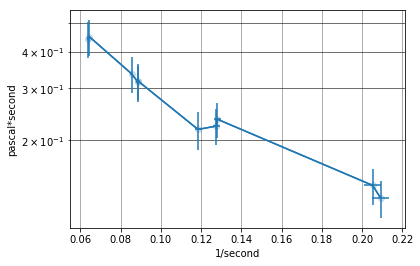

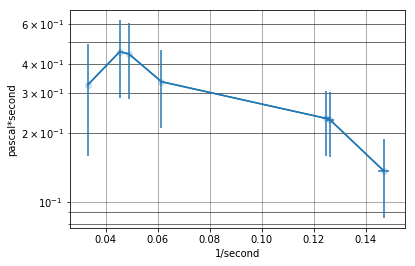

In [9]:
for material in data['material'].unique():
    dat = data[data['material'] == material].sort_values(by='t_fall')
    #display(dat)
    plt.figure()
    ml.plt_pq(1/ml.pqarray(dat['t_fall']), dat['eta'], plot=plt.semilogy)
    plt.show()